In [2]:
import requests
from bs4 import BeautifulSoup, SoupStrainer
import bs4
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [8]:
%matplotlib inline

Let's make a simple function to do the redundant task of raw_html extraction.

In [3]:
def getRawHtml(url):
    # Given a raw url, returns the html of the page.
    r = requests.get(url)
    raw_html = r.text
    return raw_html
    pass

Now the part that we would be extracting data from the site and storing them in a BeautifulSoup Object!

In [4]:
start = 1
fnames = []
fcomps = []
fproj = []
fback = []
while start < 10:
    raw_html = getRawHtml("https://www.insightdatascience.com/fellows?61ea5d1b_page="+str(start))
    
    bs = BeautifulSoup(raw_html, "html.parser")
    
    for fellows in bs.findAll('div', attrs={"fellow_name"}):
        
        fellow = (fellows.text)
        fnames.append(fellow)
    for comp in bs.findAll('div', attrs={'fellow_company'}):
        comps = (comp.text)
        fcomps.append(comps)
    for projs in bs.findAll('div', attrs={"tooltip_project"}):
        proj = (projs.text)
        fproj.append(proj)
    for backs in bs.findAll('div', attrs={'tooltip_background'}):
        back = (backs.text)
        fback.append(back)
    start +=1

The BeautifulSoup object is ready t be worked with. We can make a dataframe out of this but for now, lets just make a few wordclouds out of this!

In [19]:
# Make on long string with spaces between enteries    
com_words = ' '.join(fcomps)
back_words = ' '.join(fback)
proj_words = ' '.join(fproj)

In [24]:
# Words that you want to exclude from the word_cloud
stopwords = set(STOPWORDS)
stopwords.update(["company", "Inc", "Data", "Lab", "Consoulting", "University", "university", "PhD", "Phd"])

In [26]:
# Forming the word_cloud object
wordcloud = WordCloud(stopwords=stopwords, max_font_size=80, max_words=200, width=800, height=400).generate(com_words)
wordcloud2 = WordCloud(stopwords=stopwords, max_font_size=80, max_words=200, width=800, height=400).generate(back_words)
wordcloud3 = WordCloud(stopwords=stopwords, max_font_size=80, max_words=200, width=800, height=400).generate(proj_words)

### Lets see where most Insight fellows ended up going to!

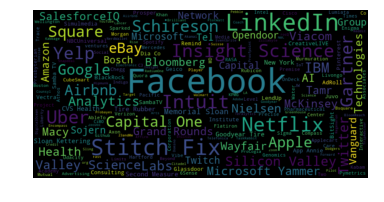

In [27]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### How about most common backgrounds!

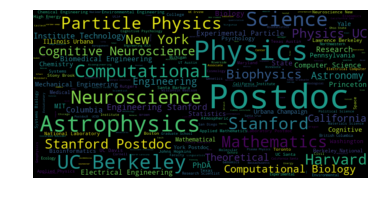

In [28]:
# Display the generated image:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

### And how about fellow backgrounds!

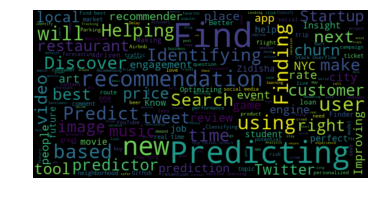

In [29]:
# Display the generated image:
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()